
# Project: TMDB Movies Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

>Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

>There are some odd characters in the ‘cast’ column. 

>The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

There will be an investigation on how well the movies performed as per release year.

-What was the average vote count for movies released per year?

-Were there any net profits or losses made by the movies made per release year?

-Has the average runtime for movies increased or decresed per release year?


In [5]:
#loading libraries needed to read dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

### Gathering and assessing the data in the dataset
The dataset will be read and data will be gathered and assessed for any missing/null values as well as any structural inefficiencies it may have.

In [6]:
m_df = pd.read_csv('tmdb-moviesn.csv')
m_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


Displays the first few rows and all the columns in the dataset


In [7]:
m_df.shape

(10866, 21)

Displays the total number of rows and columns in the dataset - (10866 rows and 21 columns)


In [8]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Shows the datatype of each variable and missing values.
There are missing values present that need to be adjusted and variables that need to be dropped as they won't be used in investigating the dataset further.

In [9]:
m_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Displays the statistics of the variables in the dataset

The vote count range from 10 to 9767 with and average of 217 counts. 
Runtime ranges from 0 to 900 minutes with the average runtime being 102 minutes (there could be movies that have null values or missing data for those with 0 minutes) 
Popularity ranges from 0 to 33 with an average of .6 
Release years range from 1960 to 2015
The adjusted revenue ranges from 0 to 2.8 bilion with an average of 51.4 million dollars
The adjusted budget ranges from 0 to 425 million with an average of 14.6 million dollars

In [10]:
m_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Displays how many entries were made for each variable


### DATA CLEANING

This is where the dataset will be modified as missing or null values will be replaced/dropped, duplicates will  be removed and the dataset trimmed for a better understanding and analysis.

In [11]:
m_df = pd.read_csv('tmdb-moviesn.csv')
sum(m_df.duplicated())

1

Indicates if there are any duplicates and how many are found in the dataset

In [12]:
m_df.drop_duplicates(inplace=True)

Eliminates the duplicates found in the dataset

In [13]:
sum(m_df.duplicated())

0

Verifies whether there are still any duplicates in the movies dataset

In [14]:
m_df['net'] = m_df['revenue_adj'] - m_df['budget_adj']

Creating a new column to display the net (profit or loss) received 

In [15]:
m_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,1.210949e+09


Displaying the dataset with the new column that was added, 'Net'

In [16]:
m_df.drop(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'budget', 'revenue'], axis = 1, inplace = True)

Dropping all the columns that won't be needed for the analysis

In [17]:
m_df.head()

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,2.101614e+08
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,1.704191e+08
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,1.718723e+09
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,1.210949e+09


Displaying the variables saved and those added
The net column displays both the profit and loss earned by the movies. Positive values indicate profits whilst negative values indicate losses.

In [18]:
m_df['release_date'] =  pd.to_datetime(m_df['release_date'], infer_datetime_format=True)

The release_date datatype changed from object to datetime.


In [19]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   popularity      10865 non-null  float64       
 2   original_title  10865 non-null  object        
 3   runtime         10865 non-null  int64         
 4   genres          10842 non-null  object        
 5   release_date    10865 non-null  datetime64[ns]
 6   vote_count      10865 non-null  int64         
 7   vote_average    10865 non-null  float64       
 8   release_year    10865 non-null  int64         
 9   budget_adj      10865 non-null  float64       
 10  revenue_adj     10865 non-null  float64       
 11  net             10865 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 1.1+ MB


In [20]:
m_df.isnull()

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,False,False,False,False,False,False,False,False,False,False,False,False
10862,False,False,False,False,False,False,False,False,False,False,False,False
10863,False,False,False,False,False,False,False,False,False,False,False,False
10864,False,False,False,False,False,False,False,False,False,False,False,False


Displays any missing or NaN values in the dataset. 
Due to the dataset being large, not all the values are displayed.

In [21]:
m_df.isnull().sum()

id                 0
popularity         0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
net                0
dtype: int64

Displays the sum of missing data in each column. 
As seen, genres has 23 missing/null values.

In [22]:
m_df.dropna(inplace = True)

All the missing/null values have been removed.

In [23]:
m_df.shape

(10842, 12)

Displays the new amount of rows and columns after modification of the variables.
The dataset now has 10842 rows and 12 columns

In [24]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10842 non-null  int64         
 1   popularity      10842 non-null  float64       
 2   original_title  10842 non-null  object        
 3   runtime         10842 non-null  int64         
 4   genres          10842 non-null  object        
 5   release_date    10842 non-null  datetime64[ns]
 6   vote_count      10842 non-null  int64         
 7   vote_average    10842 non-null  float64       
 8   release_year    10842 non-null  int64         
 9   budget_adj      10842 non-null  float64       
 10  revenue_adj     10842 non-null  float64       
 11  net             10842 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 1.1+ MB


Verification that all the columns do not have missing or null values

In [25]:
m_df['genres'].str.split('|')

0        [Action, Adventure, Science Fiction, Thriller]
1        [Action, Adventure, Science Fiction, Thriller]
2                [Adventure, Science Fiction, Thriller]
3         [Action, Adventure, Science Fiction, Fantasy]
4                             [Action, Crime, Thriller]
                              ...                      
10861                                     [Documentary]
10862                        [Action, Adventure, Drama]
10863                                 [Mystery, Comedy]
10864                                  [Action, Comedy]
10865                                          [Horror]
Name: genres, Length: 10842, dtype: object

In [27]:
m_df['genres'] = m_df['genres'].str.split('|')

In [28]:
m_df.explode('genres')

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net
0,135397,32.985763,Jurassic World,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,124,Adventure,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,124,Science Fiction,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,124,Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,120,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
10863,39768,0.065141,Beregis Avtomobilya,94,Mystery,1966-01-01,11,6.5,1966,0.000000e+00,0.000000e+00,0.000000e+00
10863,39768,0.065141,Beregis Avtomobilya,94,Comedy,1966-01-01,11,6.5,1966,0.000000e+00,0.000000e+00,0.000000e+00
10864,21449,0.064317,"What's Up, Tiger Lily?",80,Action,1966-11-02,22,5.4,1966,0.000000e+00,0.000000e+00,0.000000e+00
10864,21449,0.064317,"What's Up, Tiger Lily?",80,Comedy,1966-11-02,22,5.4,1966,0.000000e+00,0.000000e+00,0.000000e+00


Each genre has been assigned it's own row.

There are now 26955 rows compared to the 10842 that was there before, after the genre split.
However, genres will not be used when plotting visualisations

<a id='eda'></a>
## Exploratory Data Analysis

Computation of statistics and creation of visualizations with the goal of addressing the research questions that were posed in the Introduction section.


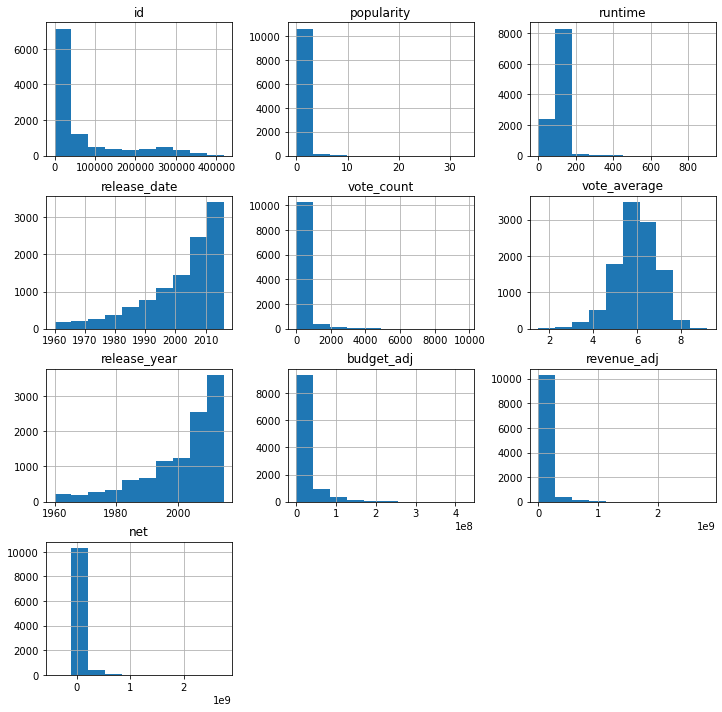

In [29]:
m_df.hist(figsize = (12,12));

Displays the histograms of all the variables to be analaysed

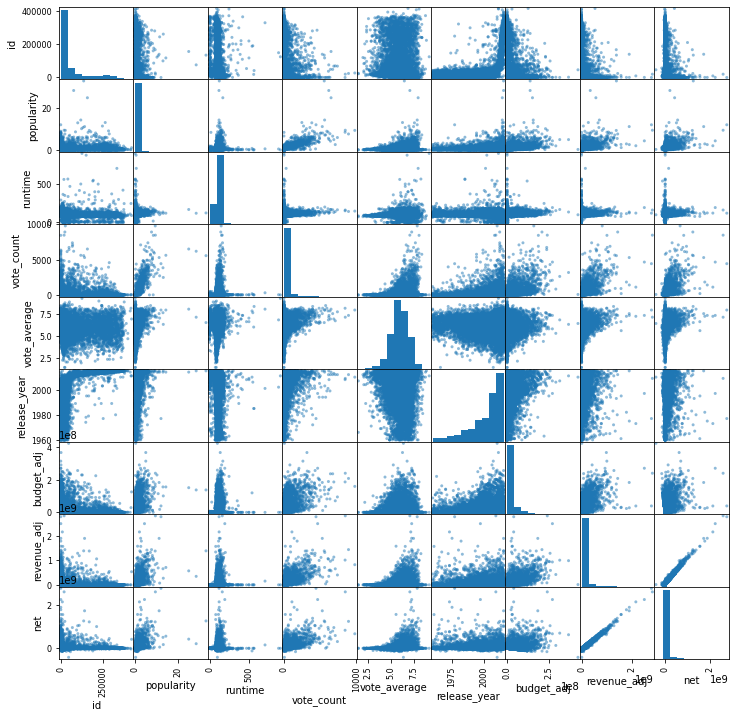

In [30]:
pd.plotting.scatter_matrix(m_df, figsize=(12, 12));

Displays the scatterplot of all the variables to be analysed

### What was the average vote count for movies released per year?

In [32]:
m_df.vote_count.describe()

count    10842.000000
mean       217.823649
std        576.180993
min         10.000000
25%         17.000000
50%         38.000000
75%        146.000000
max       9767.000000
Name: vote_count, dtype: float64

Displays the statistics of the column Vote Count

In [33]:
m_df.groupby('release_year').vote_count.count()

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     40
1971     55
1972     40
1973     55
1974     46
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    136
1990    132
1991    133
1992    133
1993    178
1994    184
1995    174
1996    203
1997    192
1998    210
1999    224
2000    226
2001    241
2002    266
2003    281
2004    307
2005    363
2006    408
2007    438
2008    495
2009    531
2010    487
2011    540
2012    584
2013    656
2014    699
2015    627
Name: vote_count, dtype: int64

Displays the amount of movies that were released each year.

In [34]:
m_df.groupby('release_year').vote_count.mean()

release_year
1960     77.531250
1961     77.580645
1962     74.750000
1963     82.823529
1964     74.690476
1965     52.000000
1966     31.739130
1967     77.550000
1968    108.128205
1969     55.903226
1970     50.025000
1971     92.381818
1972    135.825000
1973     94.054545
1974    112.956522
1975    138.363636
1976    100.425532
1977    140.894737
1978     75.353846
1979    154.912281
1980    139.717949
1981     91.219512
1982    140.555556
1983    123.575000
1984    146.390476
1985    126.247706
1986    113.016529
1987    120.512000
1988    100.524138
1989    137.110294
1990    163.446970
1991    127.864662
1992    146.218045
1993    136.426966
1994    204.298913
1995    205.551724
1996    128.162562
1997    213.463542
1998    190.676190
1999    238.602679
2000    204.380531
2001    261.601660
2002    236.481203
2003    243.505338
2004    257.980456
2005    201.961433
2006    186.477941
2007    206.372146
2008    207.173737
2009    225.274953
2010    266.973306
2011    250.812963

Displays the average amount of vote counts each release year received

Text(0, 0.5, 'Vote Count')

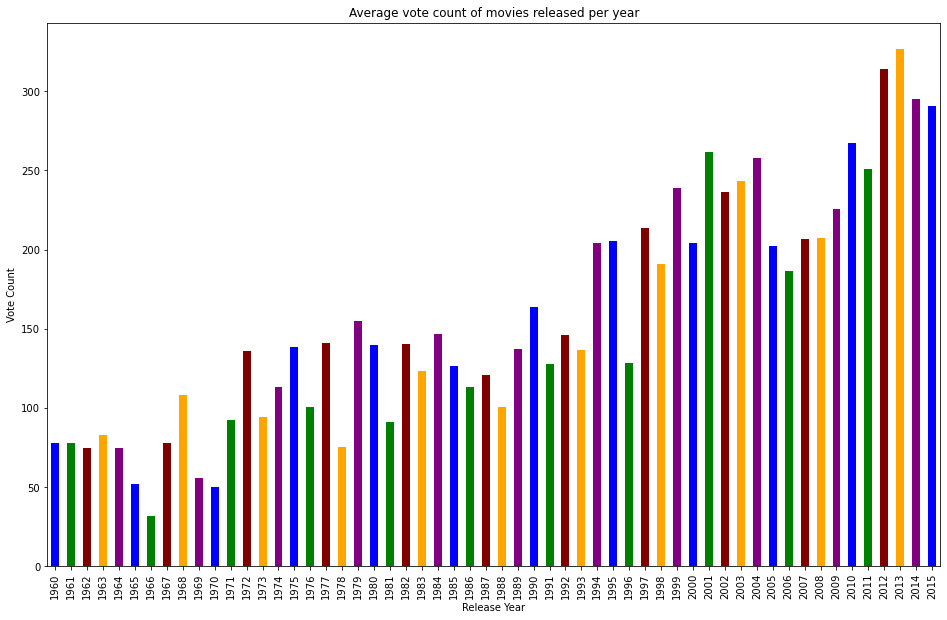

In [35]:
m_df.groupby('release_year')['vote_count'].mean().plot(kind = 'bar', title = 'Average vote count of movies released per year', color = ('blue', 'green', 'maroon', 'orange', 'purple'), figsize = (16,10))
plt.xlabel('Release Year', fontsize=10)
plt.ylabel('Vote Count', fontsize=10)

Above is a vertical bargraph depicting the variations between the average vote count in every release year

### Were there any profits or losses made by the movies made per release year?

In [36]:
m_df.net.describe()

count    1.084200e+04
mean     3.389085e+07
std      1.253424e+08
min     -4.139124e+08
25%      0.000000e+00
50%      0.000000e+00
75%      1.308384e+07
max      2.750137e+09
Name: net, dtype: float64

Displays the statistics of the column Net

In [37]:
m_df.groupby('release_year').net.mean()

release_year
1960    2.832787e+07
1961    6.861480e+07
1962    3.623546e+07
1963    2.388893e+07
1964    5.046705e+07
1965    7.669502e+07
1966    3.969746e+06
1967    1.041278e+08
1968    3.099022e+07
1969    3.870061e+07
1970    6.083370e+07
1971    3.220480e+07
1972    5.976551e+07
1973    1.034728e+08
1974    7.071519e+07
1975    8.298967e+07
1976    5.534404e+07
1977    1.274374e+08
1978    5.969460e+07
1979    7.537640e+07
1980    4.770202e+07
1981    4.096954e+07
1982    5.636968e+07
1983    4.894267e+07
1984    3.810886e+07
1985    3.955860e+07
1986    3.778630e+07
1987    4.226044e+07
1988    3.578678e+07
1989    5.283767e+07
1990    5.089185e+07
1991    3.900848e+07
1992    5.417338e+07
1993    4.388930e+07
1994    3.890628e+07
1995    5.173239e+07
1996    3.166989e+07
1997    4.177327e+07
1998    3.180858e+07
1999    3.267067e+07
2000    2.928161e+07
2001    3.969449e+07
2002    3.987236e+07
2003    3.753639e+07
2004    3.618822e+07
2005    2.821722e+07
2006    2.377963e+07


Displays the average net amount(profit/loss) made by all the movies released that year.

Text(0, 0.5, 'Net Amount')

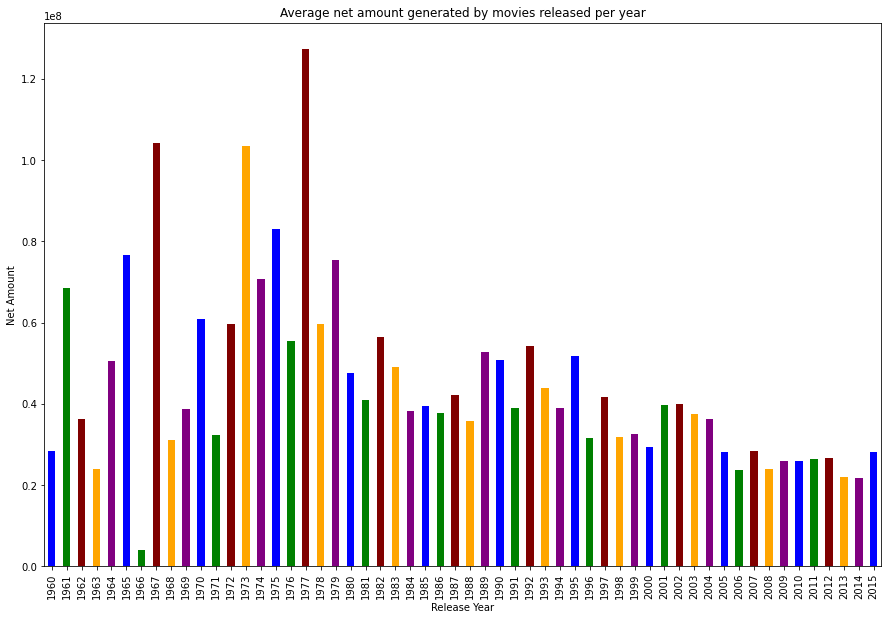

In [38]:
m_df.groupby('release_year')['net'].mean().plot(kind = 'bar', title = 'Average net amount generated by movies released per year', color = ('blue', 'green', 'maroon', 'orange', 'purple'), figsize = (15,10))
plt.xlabel('Release Year', fontsize=10)
plt.ylabel('Net Amount', fontsize=10)

Above is a vertical bargraph depicting the variations between the average net amount per release year.
The bargraph shows that there were no release years with no-profit or losses incurred rather, they varied positively.

### Has the average runtime for movies increased or decresed per release year?

In [39]:
m_df.runtime.describe()

count    10842.000000
mean       102.138443
std         31.294612
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

Displays the statistics of the column Runtime

In [40]:
m_df.groupby('release_year').runtime.mean()

release_year
1960    110.656250
1961    119.419355
1962    124.343750
1963    111.323529
1964    109.214286
1965    118.171429
1966    106.891304
1967    104.950000
1968    107.282051
1969    106.580645
1970    113.075000
1971    107.727273
1972    101.950000
1973    103.527273
1974    107.804348
1975    107.363636
1976    109.319149
1977    107.105263
1978    110.076923
1979    112.017544
1980    107.500000
1981    105.865854
1982    103.925926
1983    103.000000
1984    103.466667
1985    114.339450
1986     99.933884
1987    101.168000
1988    101.793103
1989    104.779412
1990    105.651515
1991    105.112782
1992    107.030075
1993    107.123596
1994    106.913043
1995    107.574713
1996    106.167488
1997    106.505208
1998    105.061905
1999    108.861607
2000    103.862832
2001    108.024896
2002    106.864662
2003    100.679715
2004    105.364821
2005    102.953168
2006    101.683824
2007    100.410959
2008    100.288889
2009     98.111111
2010     98.408624
2011     97.922222

Displays the average runtime by movies in each release year

Text(0, 0.5, 'Runtime')

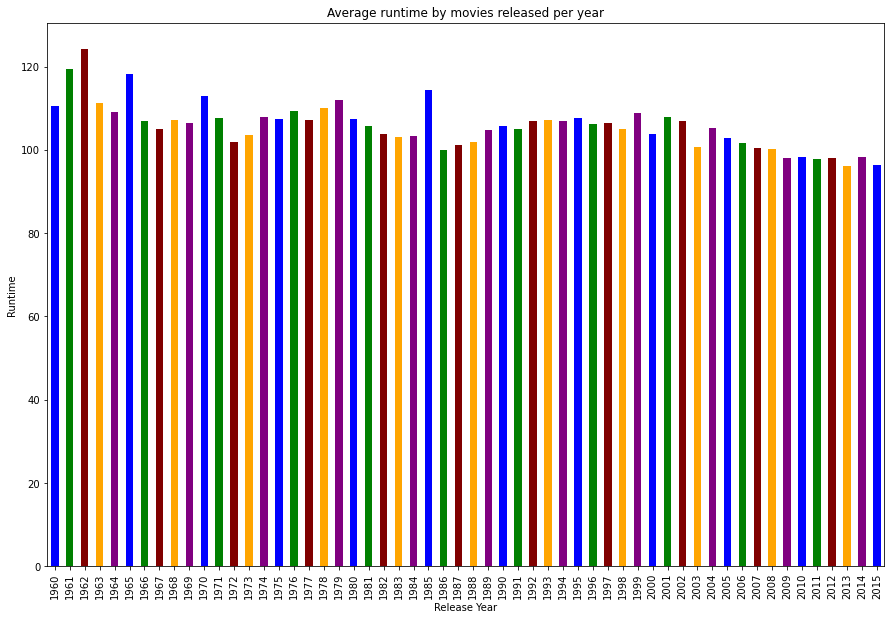

In [41]:
m_df.groupby('release_year')['runtime'].mean().plot(kind = 'bar', title = 'Average runtime by movies released per year', color = ('blue', 'green', 'maroon', 'orange', 'purple'), figsize = (15,10))
plt.xlabel('Release Year', fontsize=10)
plt.ylabel('Runtime', fontsize=10)

Above is a vertical bargraph depicting the variations between the average runtime of movies and their release year

<a id='conclusions'></a>
## Conclusions

#### Limitations
1. Genres column had multiple variables that were displayed, however were not used to answer the questions.
2. The vote_average couldn't be easily correlated with another variable as there was no method on how the result was received.
3. All questions were answered using the original dataframe.
4. No statisticale tests have been done.

#### Summary
Based on our analysis, we can see that, majority of the movies released all had higher vote counts as the years progressed even though there were fluctuations in between. The year with the lowest vote count being 1966 and the highest being 2013. This shows that more movies had been watched over the years especially the years with high vote counts.
There were fluctuations with profits earned in every release year but there seems to be a steady decline from the mid 90's(1995-2015)
The runtime of movies per release year varies as there is no steady incline or decline